## Reading 7-2 - Makefiles

### Why Makefiles? 

Long-term simplicity, as well as planning
<ul>
    <li>Can use variables to combine code segments in compilation</li>
    <li>Enables code re-use</li>
</ul>

Simplify compilation:
<ul>
    <li>Don’t need to type <code>gcc –Wall -std=c2x –Wextra –Wconversion…</code> over and over!</li>
</ul>


### Makefiles and Compiling

Think of a Makefile like a chef making a recipe!
![](https://media.tenor.com/vasUgIqlXPMAAAAd/muppet-show-muppets.gif)

### Start with the Source Code!

Source Files: The files you code, which can be though of as the recipe!
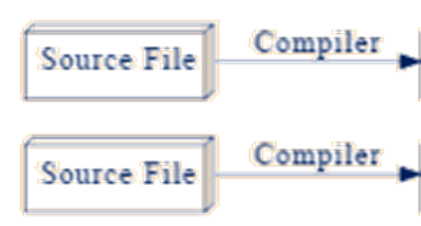


### Create Object Files

Object File: Contains formatted machine code. Think of object files as mixed ingredients

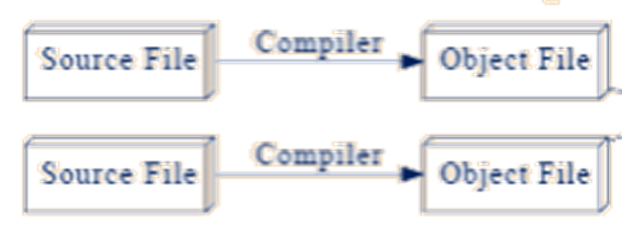

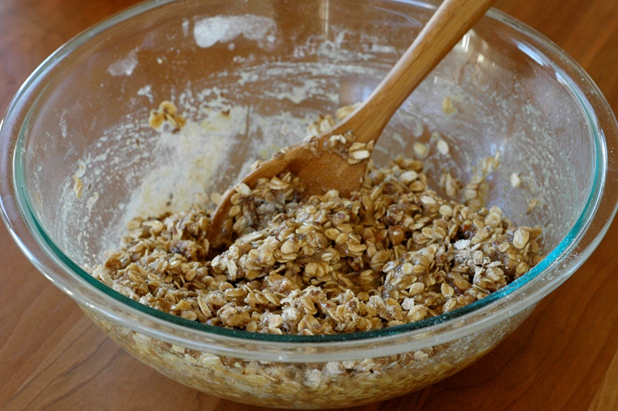

### Linking Objects

Linking – Combining the objects into an executable file. Think of this like baking the ingredients in an oven!

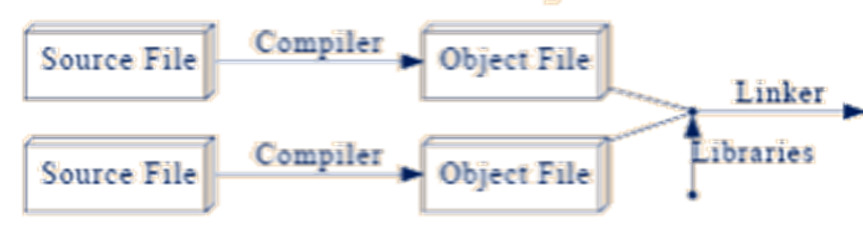

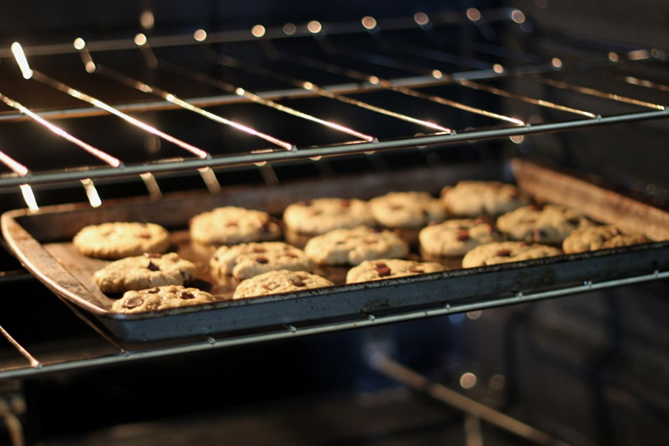

### Executables

Executable: File directly executable by the machine! The finished product.

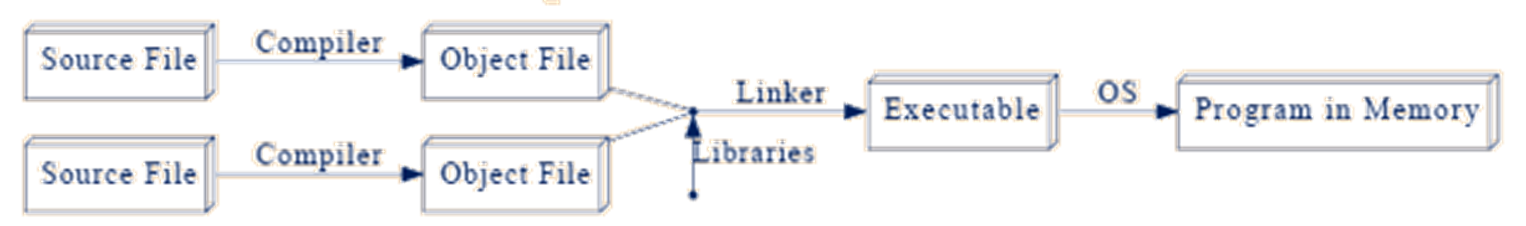

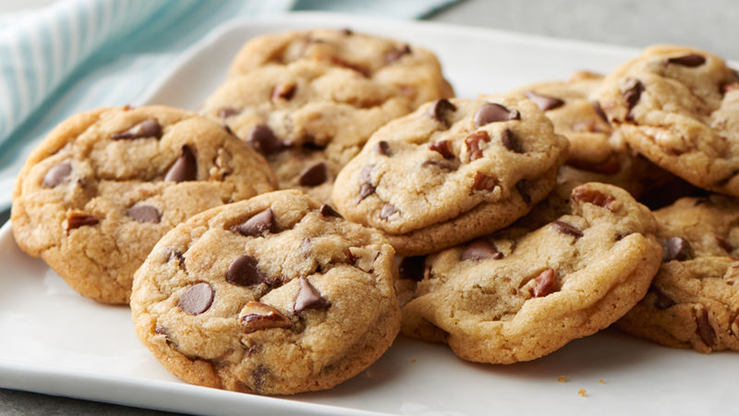

### Running the Program

Running the program is like eating the cookies!

![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExN3d1c3FyMnFta2ZueHJhMWdtdzU5YXl2dGQyaGM3bTdmOHZxcjJpOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/HGe4zsOVo7Jvy/giphy.gif)

### Makefiles and Compiling

Every Makefile contains the following five elements:

<b>Explicit Rule</b> - When and how to remake one or more files

<b>Implicit Rule</b> - When and how to remake a class of files based on their names
<ul>
    <li>Compiler looks for a rule if one is not defined</li>
    <li>We will design Makefiles to avoid implicit rules in this course</li>
</ul>

<b>Variable Definition</b> - A line that specifies a text string value for a variable that can be substituted into the text later

<b>Directive</b> - an instruction for make to do something special while reading the Makefile

<b>Comment</b> – Use a <code>#</code> to inform the reader about the meaning of the contents

### Makefile Header

First, we will indicate which compiler and flags we want
Flags: All of these will be required on course programming assignments going forward: 
<ul>
    <li><code>CC := gcc</code></li>
    <ul><li><code>gcc</code> is the “GNU Compiler Collection”, and imost commonly used Linux compiler for C</li></ul>
    <li><code>-O2</code> = Reduce compilation time (Optimization)</li>
    <ul><li>Finds opportunities to optimize your code.</li></ul>
    <li><code>-g</code> = Tells the compiler to produce debugging information</li>
    <li><code>-std=c2x</code> = Includes the ANSI C2020 and beyond standard</li>
    <li><code>-Wall</code> = Enables warning</li>
    <li><code>-Wextra</code> = Enables some extra warning flags that are not enabled by –Wall</li>
    <li><code>-Wconversion</code> = Enables warnings when implicit type casting occurs</li>
    <li><code>-Werror</code> = Make all warnings into errors. (Production quality code!!)</li>
</ul>

Here is an Example 

    # Author: Prof. Matthew Morrison
    # E-mail: matt.morrison@nd.edu
    #
    # This is the Makefile for the Lecture 7 Example.

    # gcc is for the compiler for C
    CC := gcc

    # CFLAGS are the compiler flags for when we compile C code in this course
    FLAGS := -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -lm
    CFLAGS := -std=c2x $(FLAGS)

### Now let’s run a command to build an object file

Format:

    [file_name].o: [dependencies]
        $(CC) $(CFLAGS) –c [dependencies]

><b>Note</b>: Before the <code>$(CC)</code>, you will put a <b>tab</b>, not spaces.

First, we will build the Object File for the <code>square_lib</code>. The dependencies are the <code>.c</code> files

    # Create the Square Library Object
    square_lib.o: square_lib.c
        $(CC) $(CFLAGS) -c square_lib.c
        
Then, we will build the object file for the square main file

    # Create the Square Main Object
    square.o: square.c
        $(CC) $(CFLAGS) -c square.c

### Object Variable Definition

As our programs get bigger, the number of object files will steadily increase. Copying and pasting the full list will get cumbersome. So let's define a variable with all the <code>.o</code> files we will use for the program:

    # Square Program Objects
    square_objs := square.o square_lib.o

### Executable

Finally, we will define the executable.

    [command]: [dependencies]
        $(CC) $(CFLAGS) –o [executable] [dependencies]
        
Often, programmers will have the <b>command</b> and the <b>executable</b> the same to avoid confusion. You can also run the <code>./[executable]</code> to automatically execute the program

    square: $(square_objs)
    $(CC) $(CFLAGS) -o square $(square_objs)
        ./square

### make all and Executable Variable Names

The next step will be to create a variable for executable names. This will simply scenarios where you need to run multiple programs one after the other, as well as when we delete the executables to clean our folder.

    # Executable Names
    executable_names := square

The <code>make all</code> will compile all the programs in the 

    # Make all
    all: $(executable_names)

### make clean

Finally, we will design a command to automatically clean up all the executables and object files in that folder.

    # Make clean
    clean:
      rm -rf *.o *.swp $(executable_names)

### Result and sample run

Here is the final Makefile we just created. To test in your own VS Code environment:

<b>To review:</b>

<b>1.</b> Open Docker Desktop. Go to the cse20133-user Container you created. Press the Blue Triangle to start the Container.

<b>2.</b> Open VSCode, and on the left, select the blue button in the bottom left of VSCode. At the top, select the pull-down choice “Attach to running container” and select your CSE 20133 course container.

<b>3.</b> Go into your Git Folder:

> Recall that @USERNAME is the unique username you created when you created your GitHub account. You will see your user name in the VS Code Docker

    cd cse20133-user/cse20133-@USERNAME

Create the folder:

    mkdir reading07
    cd reading07
    
### Obtaining the code

Perform the following commands:

    wget https://raw.githubusercontent.com/mmorri22/cse20133/main/readings/lec07/setup.sh
    chmod a+rx setup.sh
    ./setup.sh

Run the <code>ls</code>, and you will get:

    ~/cse20133-mmorri22/reading07$ ls
    Makefile  square.c  square_lib.c square_lib.c

Now, run the command <code>make square</code> You will get the following result:

    ~/cse20133-mmorri22/reading07$ make square
    gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -lm -c square.c
    gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -lm -c square_lib.c
    gcc -std=c2x -O2 -g -Wall -Wextra -Wconversion -Wshadow -Werror -lm -o square square.o square_lib.o
    ./square
    The square of the sum of 3 and 4 is 49
    
If you run <code>ls -l</code>, you will see how much bigger the object and executable files are than the code files.

    ~/cse20133-mmorri22/reading07$ ls -l
    total 44
    -rwxrwxrwx 1 cse20133-user cse20133-user   804 Aug 21 12:00 Makefile
    -rwxrwxrwx 1 cse20133-user cse20133-user 22088 Aug 21 12:02 square
    -rwxrwxrwx 1 cse20133-user cse20133-user   178 Aug 21 11:55 square.c
    -rwxrwxrwx 1 cse20133-user cse20133-user   165 Aug 21 11:55 square_lib.c
    -rwxrwxrwx 1 cse20133-user cse20133-user   181 Aug 21 11:55 square_lib.h
    -rwxrwxrwx 1 cse20133-user cse20133-user  6728 Aug 21 12:02 square_lib.o
    -rwxrwxrwx 1 cse20133-user cse20133-user  8024 Aug 21 12:02 square.o
    
So run <code>make clean</code> to clean up all the objects and executables:

    ~/cse20133-mmorri22/reading07$ make clean
    rm -rf *.o *.swp square

### Practice Committing and Pushing Through VS Code

Once you make changes in your GitHub folder in VS Code, you can <code>commit</code> and <code>push</code> directly from the VS Code.

From the VS Code Terminal:

    cd ..
    
At this point, you should be in the <code>cse20133-@USERNAME</code> folder

    git add --all
    git commit -m "Lecture 07 Reading Hands On"
    git push -u origin main

### <font color="red">Question 4: Describe the process of creating an executable and executing the program in memory.</font>

### <font color="red">Question 5: Describe the five elements contained in every Makefile</font>

### <font color="red">Question 6: Describe the two new Production Quality Compilation Flags <code>-g</code> and <code>-O2</code></font>